# Assignment-1 for ML Foundations

### Create a Linear Regression Model using this dataset, keeping in mind the 'attrition' column as the target column.Keep at max 8 columns as input variables and 1 as output.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [18]:
features = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'TotalWorkingYears'
]

X = df[features].values
y = df['Attrition'].values.reshape(-1,1)

print(X.shape)
print(y.shape)

(1470, 8)
(1470, 1)


In [19]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

X[:5]

array([[ 0.4463504 ,  0.74252653, -1.01090934,  1.38313827, -0.10834951,
         0.72601994,  2.12513592, -0.42164246],
       [ 1.32236521, -1.2977746 , -0.14714972, -0.24067677, -0.29171859,
         1.48887614, -0.67804939, -0.1645114 ],
       [ 0.008343  ,  1.41436324, -0.88751511,  1.28472523, -0.93765369,
        -1.67484086,  1.32422583, -0.55020799],
       [-0.42966441,  1.46146618, -0.76412088, -0.48670935, -0.76363368,
         1.24321058, -0.67804939, -0.42164246],
       [-1.08667552, -0.52429471, -0.88751511, -1.27401361, -0.64485811,
         0.3258999 ,  2.52559097, -0.67877352]])

In [20]:
m = X.shape[0]

ones = np.ones((m,1))
X = np.hstack((ones, X))

X[:5]

array([[ 1.        ,  0.4463504 ,  0.74252653, -1.01090934,  1.38313827,
        -0.10834951,  0.72601994,  2.12513592, -0.42164246],
       [ 1.        ,  1.32236521, -1.2977746 , -0.14714972, -0.24067677,
        -0.29171859,  1.48887614, -0.67804939, -0.1645114 ],
       [ 1.        ,  0.008343  ,  1.41436324, -0.88751511,  1.28472523,
        -0.93765369, -1.67484086,  1.32422583, -0.55020799],
       [ 1.        , -0.42966441,  1.46146618, -0.76412088, -0.48670935,
        -0.76363368,  1.24321058, -0.67804939, -0.42164246],
       [ 1.        , -1.08667552, -0.52429471, -0.88751511, -1.27401361,
        -0.64485811,  0.3258999 ,  2.52559097, -0.67877352]])

In [21]:
n = X.shape[1]

weights = np.zeros((n,1))

weights

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [22]:
learning_rate = 0.01
iterations = 1000
m = len(y)

cost_history = []

for i in range(iterations):
    
    # Prediction
    predictions = X.dot(weights)
    
    # Error
    errors = predictions - y
    
    # Gradient
    gradients = (1/m) * X.T.dot(errors)
    
    # Update weights
    weights = weights - learning_rate * gradients
    
    # Cost calculate
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    
    cost_history.append(cost)

print("Training Complete")
print("Final Weights:\n", weights)

Training Complete
Final Weights:
 [[ 0.16121753]
 [-0.0400019 ]
 [-0.02092266]
 [ 0.02929602]
 [-0.00318933]
 [-0.02347333]
 [ 0.00601405]
 [ 0.03950314]
 [-0.02703168]]


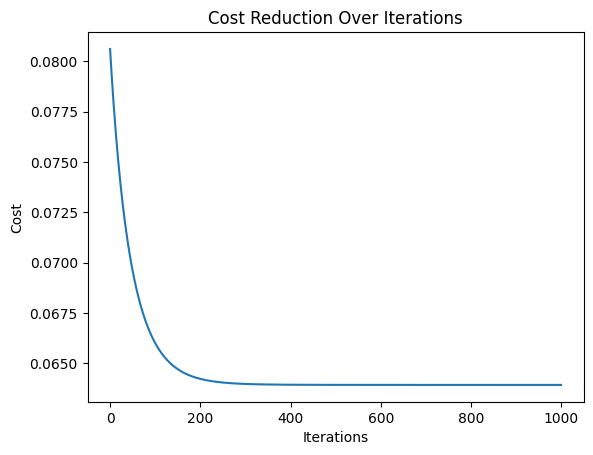

In [23]:
plt.figure()
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

In [24]:
y_pred = X.dot(weights)

y_pred[:5]

array([[0.19605702],
       [0.12539371],
       [0.18031491],
       [0.13700812],
       [0.32893295]])

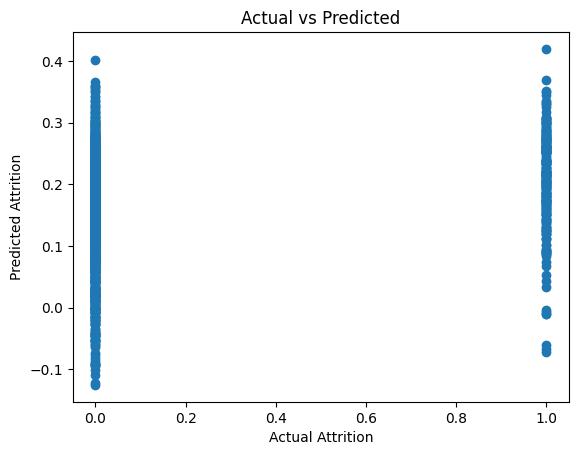

In [25]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual Attrition")
plt.ylabel("Predicted Attrition")
plt.title("Actual vs Predicted")
plt.show()

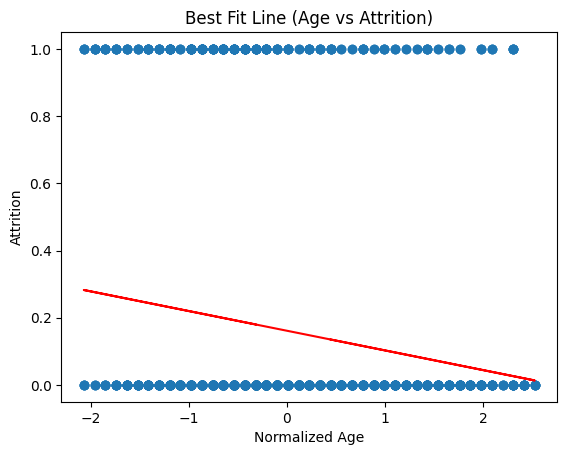

In [26]:
X_age = df[['Age']].values
y_age = df['Attrition'].values.reshape(-1,1)

# Normalize
X_age = (X_age - X_age.mean()) / X_age.std()

# Add bias
ones = np.ones((len(X_age),1))
X_age = np.hstack((ones, X_age))

# Initialize
weights_age = np.zeros((2,1))

# Train
for i in range(1000):
    predictions = X_age.dot(weights_age)
    errors = predictions - y_age
    gradients = (1/len(y_age)) * X_age.T.dot(errors)
    weights_age = weights_age - 0.01 * gradients

# Plot
plt.figure()
plt.scatter(X_age[:,1], y_age)
plt.plot(X_age[:,1], X_age.dot(weights_age), color='red')
plt.xlabel("Normalized Age")
plt.ylabel("Attrition")
plt.title("Best Fit Line (Age vs Attrition)")
plt.show()